<a href="https://colab.research.google.com/github/sathwika2005/ML_Project/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Base Model (Ridge Regression) RMSE: 993042.73

Base Model Predictions vs Actual:
        Actual      Predicted
4240  470000.0  404781.031987
2284  325000.0  250674.332871
944   330000.0  277131.200251
2277  248000.0  579979.363754
3835  175000.0  224822.605672

Ensemble Voting Regressor RMSE: 991227.06
Ensemble Bagging Regressor RMSE: 990682.12
Ensemble Boosting Regressor RMSE: 991284.53

Voting Regressor Predictions vs Actual:
        Actual      Predicted
4240  470000.0  455640.483698
2284  325000.0  260839.577400
944   330000.0  322734.316725
2277  248000.0  579373.519608
3835  175000.0  296580.019435

Bagging Regressor Predictions vs Actual:
        Actual      Predicted
4240  470000.0  449831.575078
2284  325000.0  290117.378852
944   330000.0  369407.396169
2277  248000.0  548352.180071
3835  175000.0  382946.632876

Boosting Regressor Predictions vs Actual:
        Actual      Predicted
4240  470000.0  502665.993800
2284  325000.0  384626.536158
944   330000.0  493998.987447
227

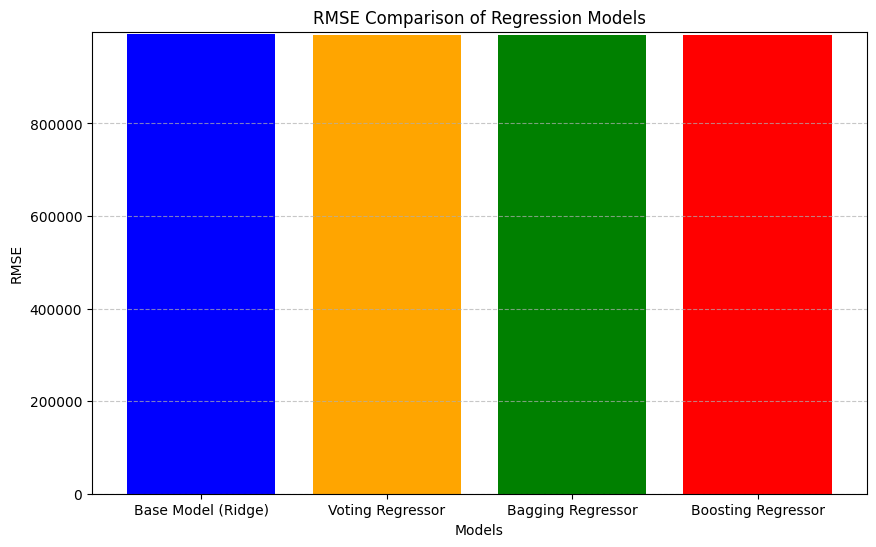

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the new dataset
file_path = '/content/data.csv'  # Update this with the actual path
data = pd.read_csv(file_path)

# Handle missing values if necessary
data_clean = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data_clean.select_dtypes(include=['object']).columns:
    data_clean[column] = label_encoder.fit_transform(data_clean[column])

# Define features (X) and target (y)
X = data_clean.drop(columns=['price'])  # Assuming 'price' is the target column
y = data_clean['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Step 1: Feature Scaling -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- Step 2: Train and evaluate the base model -----

# Define the base model (Ridge Regression)
base_model = Ridge(alpha=1.0)
base_model.fit(X_train_scaled, y_train)

# Predict values for the base model
y_pred_base = base_model.predict(X_test_scaled)

# Calculate accuracy (RMSE) for the base model
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
print(f"Base Model (Ridge Regression) RMSE: {rmse_base:.2f}")

# Select a few instances from the test set to compare predictions
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
y_test_sample = y_test.loc[sample_indices]
y_pred_base_sample = base_model.predict(X_test_scaled[X_test.index.isin(sample_indices)])

print("\nBase Model Predictions vs Actual:")
print(pd.DataFrame({'Actual': y_test_sample, 'Predicted': y_pred_base_sample}))

# ----- Step 3: Perform Ensemble Learning (Voting, Bagging, Boosting) -----

# Define individual regressors for ensemble methods
reg1 = Ridge(alpha=1.0)
reg2 = DecisionTreeRegressor(max_depth=5, random_state=42)

# 1. Voting Regressor
voting_reg = VotingRegressor([('ridge', reg1), ('dt', reg2)])
voting_reg.fit(X_train_scaled, y_train)
y_pred_voting = voting_reg.predict(X_test_scaled)

# 2. Bagging Regressor (with tuned Decision Tree)
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=50, random_state=42)
bagging_reg.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_reg.predict(X_test_scaled)

# 3. Boosting Regressor (AdaBoost with tuned Decision Tree)
boosting_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=50, random_state=42)
boosting_reg.fit(X_train_scaled, y_train)
y_pred_boosting = boosting_reg.predict(X_test_scaled)

# ----- Step 4: Calculate Accuracy (RMSE) for Ensemble Models -----

rmse_voting = np.sqrt(mean_squared_error(y_test, y_pred_voting))
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
rmse_boosting = np.sqrt(mean_squared_error(y_test, y_pred_boosting))

print(f"\nEnsemble Voting Regressor RMSE: {rmse_voting:.2f}")
print(f"Ensemble Bagging Regressor RMSE: {rmse_bagging:.2f}")
print(f"Ensemble Boosting Regressor RMSE: {rmse_boosting:.2f}")

# Compare predictions for the same instances
y_pred_voting_sample = voting_reg.predict(X_test_scaled[X_test.index.isin(sample_indices)])
y_pred_bagging_sample = bagging_reg.predict(X_test_scaled[X_test.index.isin(sample_indices)])
y_pred_boosting_sample = boosting_reg.predict(X_test_scaled[X_test.index.isin(sample_indices)])

# Display the predictions for ensemble models
print("\nVoting Regressor Predictions vs Actual:")
print(pd.DataFrame({'Actual': y_test_sample, 'Predicted': y_pred_voting_sample}))

print("\nBagging Regressor Predictions vs Actual:")
print(pd.DataFrame({'Actual': y_test_sample, 'Predicted': y_pred_bagging_sample}))

print("\nBoosting Regressor Predictions vs Actual:")
print(pd.DataFrame({'Actual': y_test_sample, 'Predicted': y_pred_boosting_sample}))

# ----- Step 5: Compare Accuracy Improvement -----

best_rmse = min(rmse_voting, rmse_bagging, rmse_boosting)
accuracy_improvement = rmse_base - best_rmse
print(f"\nBest Ensemble Model RMSE: {best_rmse:.2f}")
print(f"Accuracy Improvement (Base vs Best Ensemble): {accuracy_improvement:.2f}")

# ----- Step 6: Plot RMSE for all models -----
# Prepare data for plotting
models = ['Base Model (Ridge)', 'Voting Regressor', 'Bagging Regressor', 'Boosting Regressor']
rmse_values = [rmse_base, rmse_voting, rmse_bagging, rmse_boosting]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('RMSE Comparison of Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) + 5000)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
